In [34]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
 
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1 + X.shape[1])
        self.cost_ = []
 
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) -((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
 
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
 
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
 
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [35]:
import pandas as pd
df=pd.read_csv('iris.csv')
import matplotlib.pyplot as plt
import numpy as np
y=df.iloc[0:100,4].values
y=np.where(y=='setosa',0,1)
X=df.iloc[0:100,[0,2]].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']  # Remove transparency
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl, edgecolor='black')


In [38]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

C:\Users\itsme\AppData\Local\Temp\ipykernel_34852\315712219.py:18: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) -((1 - y).dot(np.log(1 - output))))


C:\Users\itsme\AppData\Local\Temp\ipykernel_34852\269723572.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl, edgecolor='black')


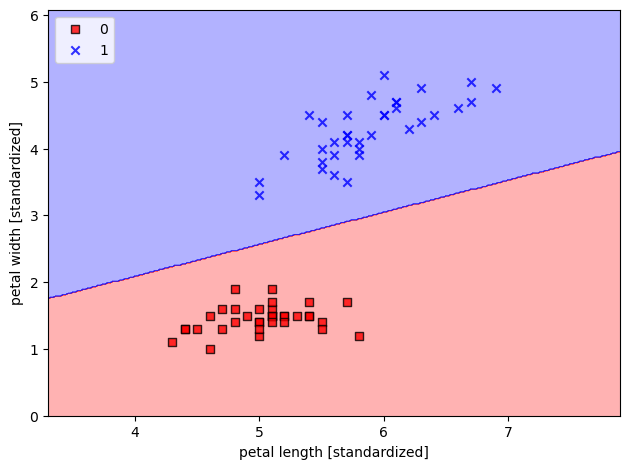

In [39]:
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
